In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sherlockholmes.txt to sherlockholmes.txt


**1. Building the Dataset from .txt**

In [3]:
file = open("sherlockholmes.txt", "r", encoding = "utf8")
old_lines = []
for i in file:
    old_lines.append(i)

lines = []
z = len(old_lines)
for i in range(0,len(old_lines)):
  if i>57 and i<z-373:
    lines.append(old_lines[i])

data = ""
for i in lines:
  data = ' '. join(lines) 

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','').replace('I.','').replace('_','')

data = data.split()
data = ' '.join(data)
print("Total Characters in Dataset = " + str(len(data)))
print(data[0:500])

Total Characters in Dataset = 553406
A SCANDAL IN BOHEMIA To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a


**2. Vectorization Method - Bag of Words**

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]

vocab_size = len(tokenizer.word_index) + 1
print("No. of Words in our Vocabulary = " + str(vocab_size))

sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("No. of 3-word sequences are =", len(sequences))
sequences = np.array(sequences)

No. of Words in our Vocabulary = 8335
No. of 3-word sequences are = 105559


In [5]:
#building training sets
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

y = to_categorical(y, num_classes=vocab_size)

**3. Building and Training Model**

In [6]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=3))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(vocab_size, activation='softmax'))
adam = Adam(lr=0.001)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 100)            833500    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 8335)              2508835   
                                                                 
Total params: 3,643,535
Trainable params: 3,643,535
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


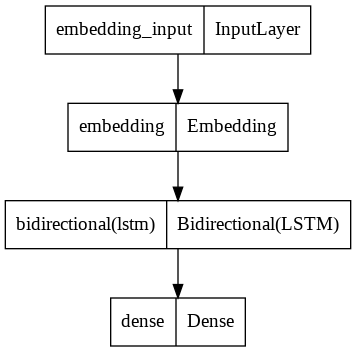

In [7]:
plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
checkpoint = ModelCheckpoint("final_model1.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=50, verbose=1, callbacks=[checkpoint])

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')
plt.show()
plt.savefig('drive/MyDrive/model1.png')

Epoch 1/50
3299/3299 [==============================] - ETA: 0s - loss: 6.2330 - accuracy: 0.0797
Epoch 1: loss improved from inf to 6.23300, saving model to final_model1.h5
3299/3299 [==============================] - 226s 67ms/step - loss: 6.2330 - accuracy: 0.0797
Epoch 2/50
3299/3299 [==============================] - ETA: 0s - loss: 5.4555 - accuracy: 0.1299
Epoch 2: loss improved from 6.23300 to 5.45554, saving model to final_model1.h5
3299/3299 [==============================] - 215s 65ms/step - loss: 5.4555 - accuracy: 0.1299
Epoch 3/50
3299/3299 [==============================] - ETA: 0s - loss: 5.0037 - accuracy: 0.1545
Epoch 3: loss improved from 5.45554 to 5.00365, saving model to final_model1.h5
3299/3299 [==============================] - 218s 66ms/step - loss: 5.0037 - accuracy: 0.1545
Epoch 4/50
3299/3299 [==============================] - ETA: 0s - loss: 4.5775 - accuracy: 0.1792
Epoch 4: loss improved from 5.00365 to 4.57752, saving model to final_model1.h5
3299/3299 

**4. Predicting the word.**

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('drive/MyDrive/Lab/SEM7/ROSPLab/next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

text = input("Enter your line: ")
  
if text == "0":
    print("Execution completed.....")
else:
    text = text.split(" ")
    text = text[-3:]
    print(text)
        
Predict_Next_Words(model, tokenizer, text)